In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

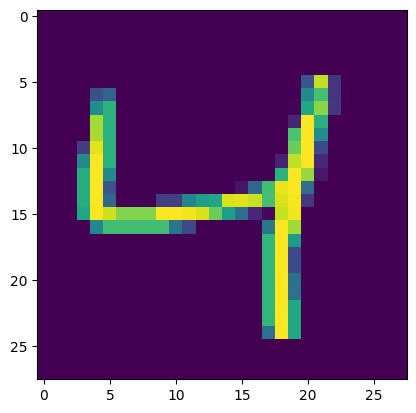

In [3]:
plt.imshow(X_train[2])

In [4]:
X_train = X_train/255
X_test  = X_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [11]:
#going down to 3.2% of the original size

25/784 *100

3.188775510204082

In [12]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [13]:
autoencoder = Sequential([encoder,decoder])

In [14]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer=SGD(learning_rate=1.5),
                   metrics=['accuracy'])

In [15]:
autoencoder.fit(X_train, X_train,epochs=5,
               validation_data=[X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2562 - accuracy: 0.0811 - val_loss: 0.2199 - val_accuracy: 0.1090
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2007 - accuracy: 0.1406 - val_loss: 0.1793 - val_accuracy: 0.1680
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1660 - accuracy: 0.1863 - val_loss: 0.1542 - val_accuracy: 0.2029
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1499 - accuracy: 0.2097 - val_loss: 0.1442 - val_accuracy: 0.2147
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1430 - accuracy: 0.2202 - val_loss: 0.1404 - val_accuracy: 0.2221


In [17]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 93ms/step


Original Image


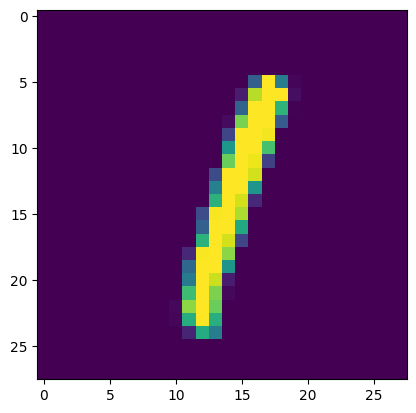

Attempted Reconstruction (After Autoencoder)


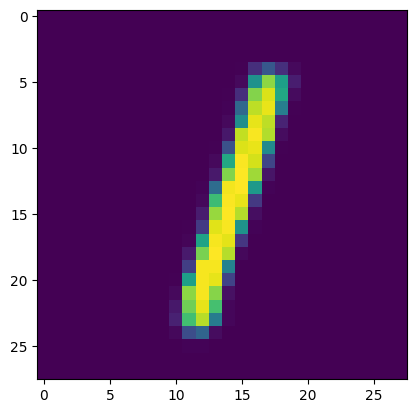

In [20]:
n = 5

print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction (After Autoencoder)')
plt.imshow(passed_images[n])

In [21]:
from tensorflow.keras.layers import GaussianNoise

In [22]:
sample = GaussianNoise(0.2)

In [23]:
noisey = sample(X_test[:10], training=True)

Original


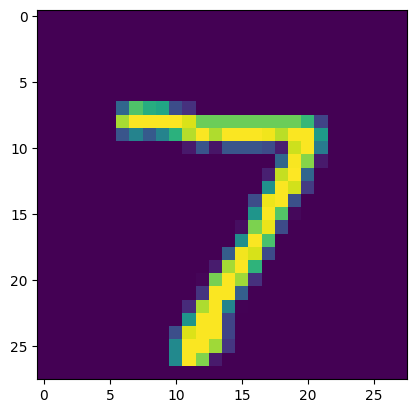

Noised


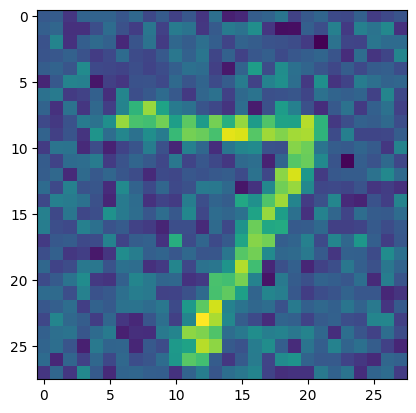

In [25]:
n = 0

print("Original")
plt.imshow(X_test[n])
plt.show()
print("Noised")
plt.imshow(noisey[n])
plt.show()

In [26]:
import tensorflow as tf

In [28]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [29]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [30]:
noise_remover = Sequential([encoder,decoder])

In [31]:
noise_remover.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [32]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1728 - accuracy: 0.1800
Epoch 2/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1318 - accuracy: 0.2300
Epoch 3/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1210 - accuracy: 0.2452
Epoch 4/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1152 - accuracy: 0.2554
Epoch 5/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1117 - accuracy: 0.2609
Epoch 6/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1094 - accuracy: 0.2663
Epoch 7/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1077 - accuracy: 0.2701
Epoch 8/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1061 - accuracy: 0.2723


<AxesSubplot: >

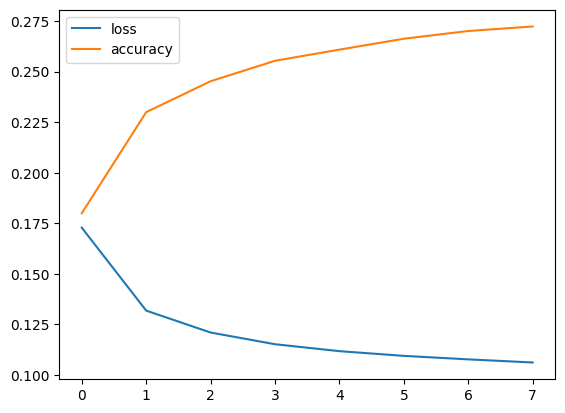

In [34]:
loss = pd.DataFrame(noise_remover.history.history)
loss.plot()

In [35]:
ten_noisey_images = sample(X_test[:10], training=True)

In [36]:
denoised = noise_remover(ten_noisey_images)

Original


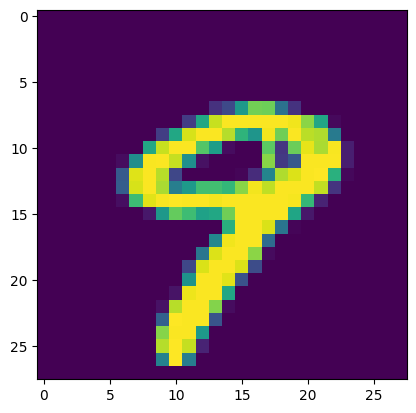

Noise added


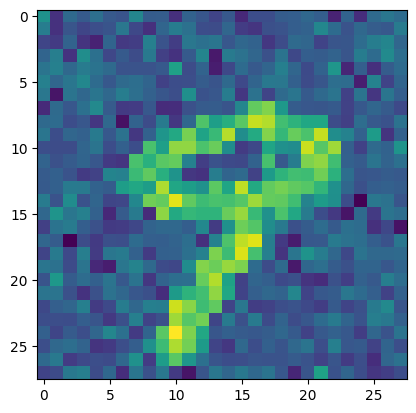

Removed Noise


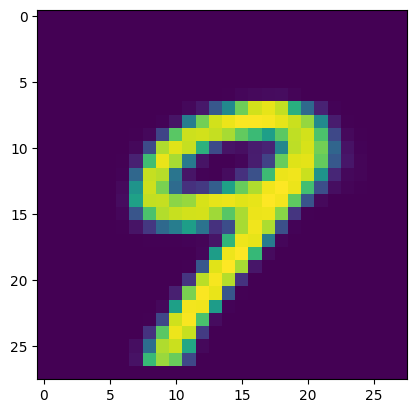

In [41]:
n = 9

print("Original")
plt.imshow(X_test[n])
plt.show()
print("Noise added")
plt.imshow(ten_noisey_images[n])
plt.show()
print("Removed Noise")
plt.imshow(denoised[n])
plt.show()